In [4]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load dataset
file_path = r"C:\Users\LENOVO THINKPAD 13\Downloads\Timeseries (2)\exchange_rate.csv"
data = pd.read_csv(file_path)

# Step 3: Explore the data
data.head()



,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


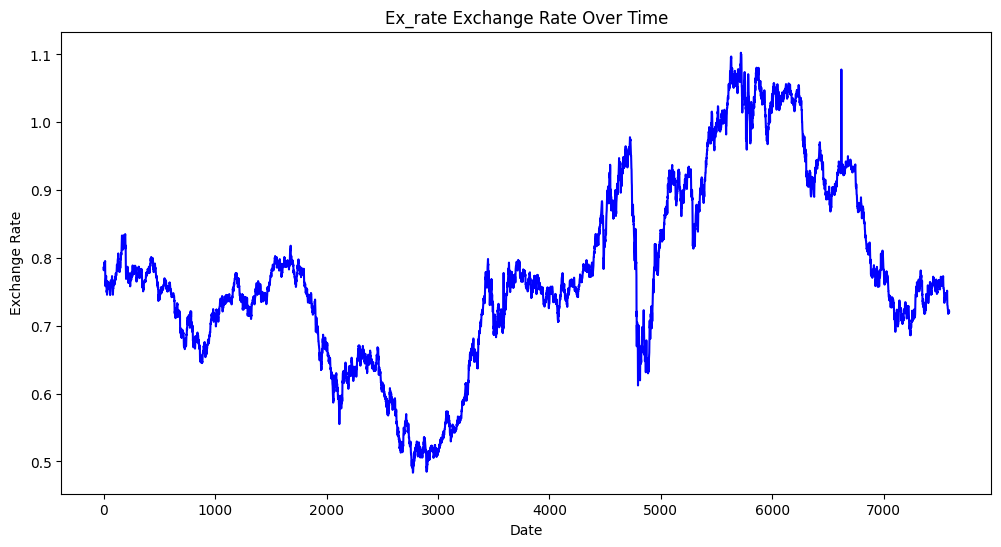

In [6]:
print(data.info())

# Step 4: Focus on USD to AUD exchange rate
currency = 'Ex_rate'  # replace with exact column name in your file
ts = data[currency]

# Step 5: Plot the time series
plt.figure(figsize=(12,6))
plt.plot(ts, color='blue')
plt.title('Ex_rate Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()


In [7]:
# Step 6: Check missing values
print(ts.isnull().sum())

# Step 7: Fill missing values using forward fill
ts.fillna(method='ffill', inplace=True)


0


C:\Users\LENOVO THINKPAD 13\AppData\Local\Temp\ipykernel_16184\752240718.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts.fillna(method='ffill', inplace=True)


In [8]:
from statsmodels.tsa.stattools import adfuller

# Step 8: ADF Test
adf_result = adfuller(ts)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# If p-value > 0.05, series is non-stationary → differencing required


ADF Statistic: -1.6649941807381528
p-value: 0.4492327353597901


<Figure size 1200x400 with 0 Axes>

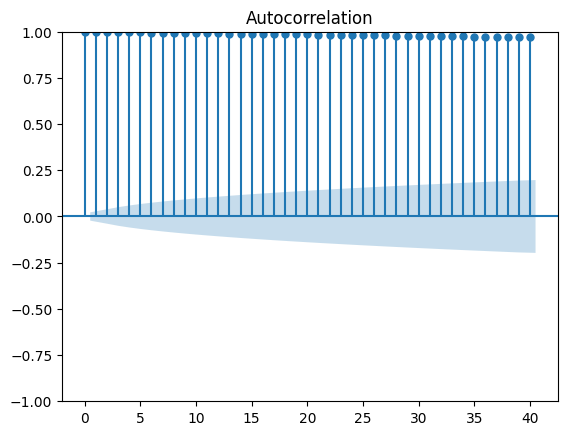

<Figure size 1200x400 with 0 Axes>

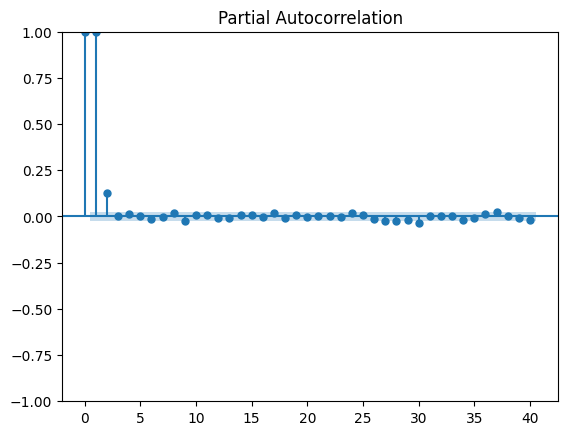

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 9: Plot ACF and PACF
plt.figure(figsize=(12,4))
plot_acf(ts, lags=40)
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(ts, lags=40)
plt.show()


In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Step 10: Fit ARIMA (example: p=1, d=1, q=1)
p, d, q = 1, 1, 1
arima_model = ARIMA(ts, order=(p,d,q))
arima_result = arima_model.fit()

# Step 11: Summary
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 30 Sep 2025   AIC                         -56102.322
Time:                        19:01:54   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

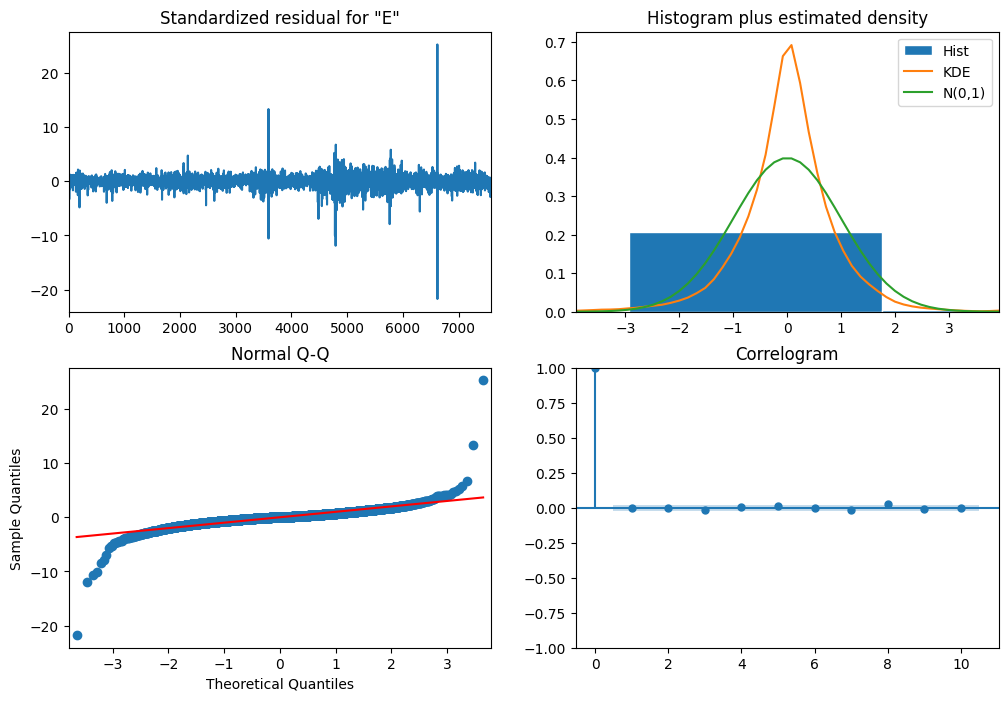

In [11]:
# Step 12: Residual diagnostics
arima_result.plot_diagnostics(figsize=(12,8))
plt.show()


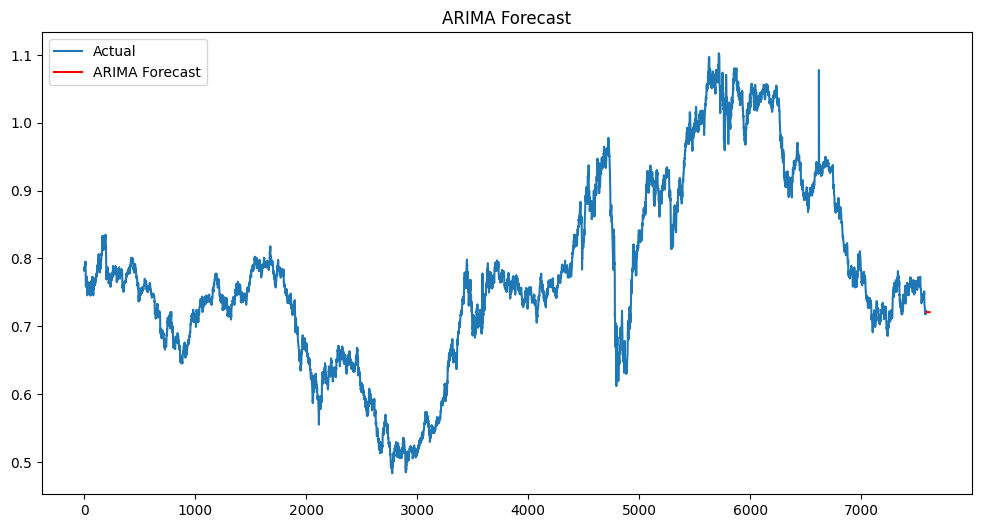

In [12]:
# Step 13: Forecast next 30 days
forecast_steps = 30
arima_forecast = arima_result.forecast(steps=forecast_steps)

plt.figure(figsize=(12,6))
plt.plot(ts, label='Actual')
plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


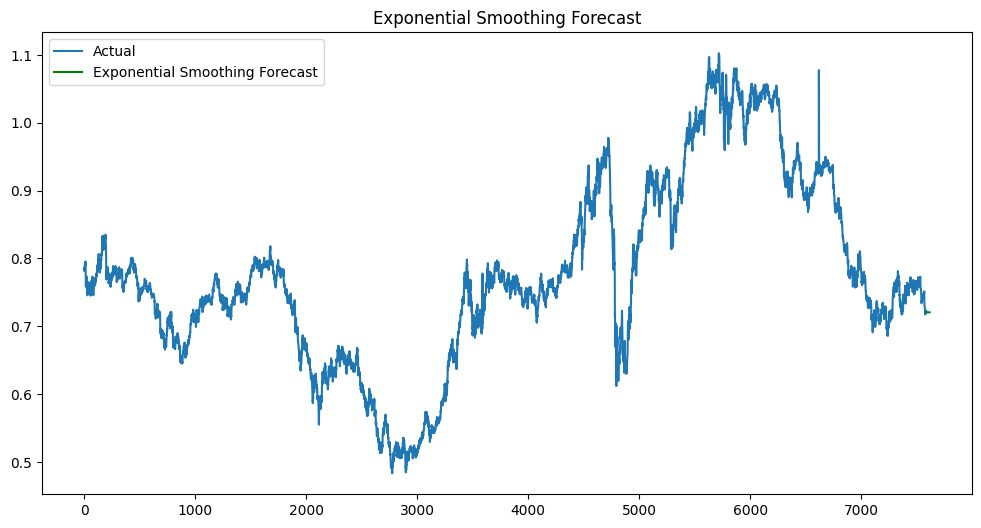

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 14: Fit Holt-Winters (trend, no seasonality example)
exp_model = ExponentialSmoothing(ts, trend='add', seasonal=None)
exp_result = exp_model.fit(optimized=True)

# Step 15: Forecast next 30 days
exp_forecast = exp_result.forecast(steps=forecast_steps)

plt.figure(figsize=(12,6))
plt.plot(ts, label='Actual')
plt.plot(exp_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 16: Use last 30 actual values as test
test_actual = ts[-forecast_steps:]

# ARIMA metrics
mae_arima = mean_absolute_error(test_actual, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test_actual, arima_forecast))
mape_arima = np.mean(np.abs((test_actual - arima_forecast)/test_actual))*100

# Exponential Smoothing metrics
mae_exp = mean_absolute_error(test_actual, exp_forecast)
rmse_exp = np.sqrt(mean_squared_error(test_actual, exp_forecast))
mape_exp = np.mean(np.abs((test_actual - exp_forecast)/test_actual))*100

# Step 17: Print metrics
print("ARIMA Metrics:")
print(f"MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima:.2f}%")
print("\nExponential Smoothing Metrics:")
print(f"MAE: {mae_exp}, RMSE: {rmse_exp}, MAPE: {mape_exp:.2f}%")


ARIMA Metrics:
MAE: 0.012724006489305202, RMSE: 0.016982710912755217, MAPE: nan%

Exponential Smoothing Metrics:
MAE: 0.012755756156713368, RMSE: 0.017005229952751045, MAPE: nan%


In [15]:
if rmse_arima < rmse_exp:
    print("\nARIMA performed better based on RMSE.")
else:
    print("\nExponential Smoothing performed better based on RMSE.")



ARIMA performed better based on RMSE.


✅ Key Points in this Workflow:

Data Preparation: Handled missing values and checked stationarity.

ARIMA Modeling: Used ACF/PACF for parameter selection, fitted the model, and did diagnostics.

Exponential Smoothing: Applied Holt-Winters or Holt’s Linear depending on trend/seasonality.

Forecasting & Evaluation: Forecasted future values and compared models using MAE, RMSE, and MAPE.

Visualization: All key steps are visualized for clarity.